In [1]:
import numpy as np
import math
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import random

np.set_printoptions(suppress=True, formatter={'float': '{:0.3f}'.format})

In [2]:
A_0 = np.eye(2)
# A_0 = np.array([[1, 0],
#                 [0, 10]])
print(f'A_0:\n {A_0}\n')

hess = np.array([[11, 1],
                [1, 0.1]])
# hess = np.array([[10.1, 1],
#                 [1, 0.1]])

print(f'hess:\n {hess}\n')
eig = np.linalg.eigvals(hess)
print(f'valeurs propres hess:\n {eig}\n')
print(f'conditionnement de hess: {np.max(eig)/np.min(eig)}\n')
print(f'norme d operateur de hess: {np.linalg.norm(hess, 2)}\n')
print(f'norme de frobenius hess: {np.linalg.norm(hess)}\n')


hess_inv = np.linalg.inv(hess)
# A_0 = hess_inv
print(f'hess_inv:\n {hess_inv}\n')
eig_inv = np.linalg.eigvals(hess_inv)
print(f'valeurs propres hess_inv:\n {eig_inv}\n')



A_0:
 [[1.000 0.000]
 [0.000 1.000]]

hess:
 [[11.000 1.000]
 [1.000 0.100]]

valeurs propres hess:
 [11.091 0.009]

conditionnement de hess: 1230.0991870574237

norme d operateur de hess: 11.090983667184013

norme de frobenius hess: 11.090987332063815

hess_inv:
 [[1.000 -10.000]
 [-10.000 110.000]]

valeurs propres hess_inv:
 [0.090 110.910]



n_min for <1: 63


  0%|          | 0/1000001 [00:00<?, ?it/s]

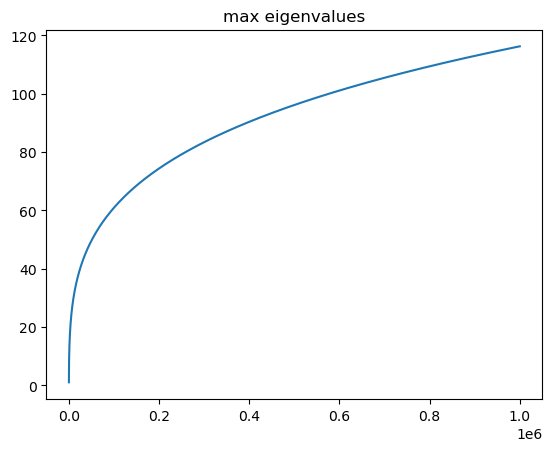

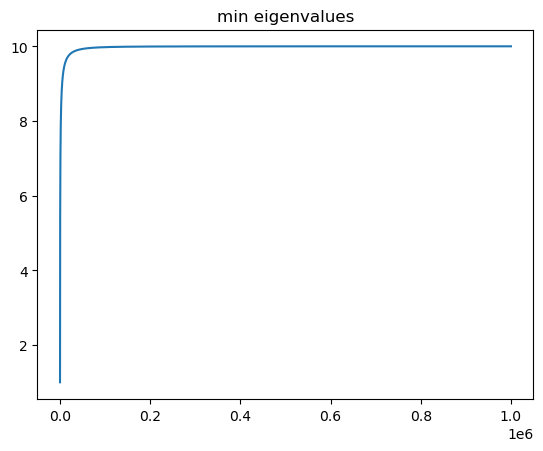

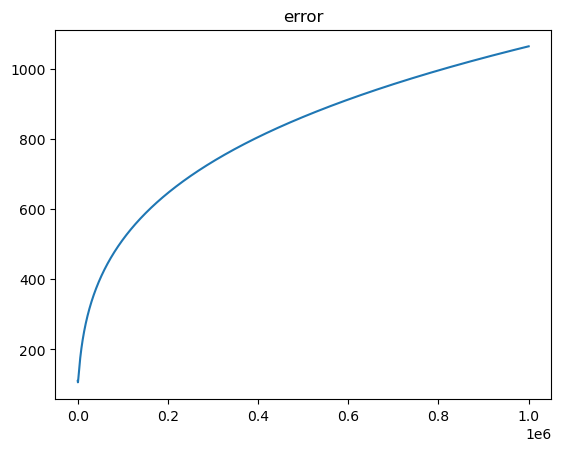

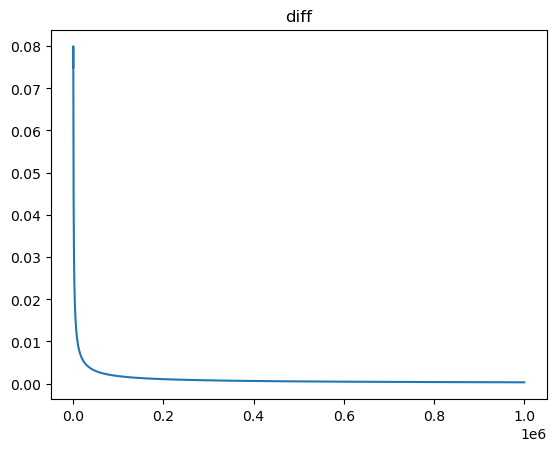

In [7]:
def update(A, hess, n, algo='article', rand=False, worst_case=False):
    gamma_n = n**-0.75
    if rand:
        z = random.randint(0, 1)
        if worst_case:
            z = 1
        Z = np.array([1, 0]) if z == 0 else np.array([0, 1])
        Q = hess @ Z
        T = np.outer(Q, Z)
    else:
        T = hess
   
    if algo == 'article':
        # A_new = A - gamma_n * (A @ T.T + T @ A - 2 * np.eye(2))
        A_new = A - gamma_n * (T @ A - np.eye(2))

    elif algo == 'bruno':
        A_new = A - gamma_n * (A @ T.T + T @ A - 2 * np.eye(2)) + (gamma_n**2) * T @ A @ T.transpose()

    elif algo == 'guillaume':
        A_new = A - gamma_n * (hess @ A - np.eye(2)) @ np.outer(Z, Z)
    
    else:
        raise ValueError('algo not recognized')
  
    eig = np.linalg.eigvals(A_new)
    return A_new, np.min(eig), np.max(eig)


# Rank at which gamma_n |Q_n| < 1
n_min = int(np.ceil( (2 * np.linalg.norm(hess))**(4/3)))
print(f'n_min for <1: {n_min}')
# n_min = 1
n_max = n_min + int(1e6)

A_n = A_0
list_max_eig = [np.max(np.linalg.eigvals(A_0))]
list_min_eig = [np.min(np.linalg.eigvals(A_0))]
list_err = [np.linalg.norm(hess_inv - A_0)]
list_diff = []

for n in tqdm(range(n_min,n_max+1)):
    A_new, min_eig, max_eig  = update(A_n, hess, n, algo='article', rand=True, worst_case=True)
    # A_new, min_eig, max_eig  = update(A_n, hess, n, algo='article', rand=False, worst_case=False)
    # list_max_eig.append(max_eig / (n**0.25 - n_min**0.25 + 1))
    list_max_eig.append(max_eig)
    list_min_eig.append(min_eig)
    list_diff.append(np.linalg.norm(A_new - A_n))
    A_n = A_new
    list_err.append(np.linalg.norm(hess_inv - A_n))

# plot max eigenvalues
plt.plot(list_max_eig[:])
plt.title('max eigenvalues')
plt.show()

# plot min eigenvalues
plt.plot(list_min_eig[:])
plt.title('min eigenvalues')
plt.show()

# plot error
plt.plot(list_err[:])
plt.title('error')
plt.show()

# plot diff
plt.plot(list_diff[:])
plt.title('diff')
plt.show()

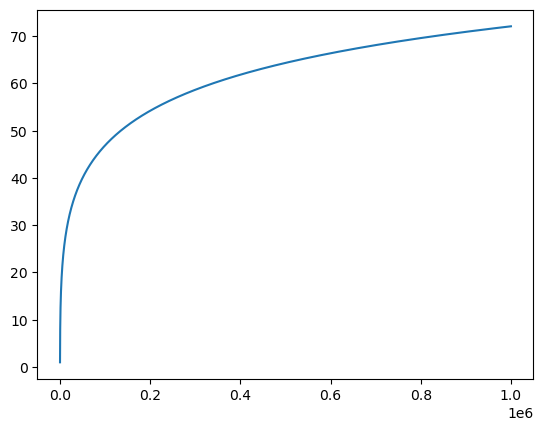

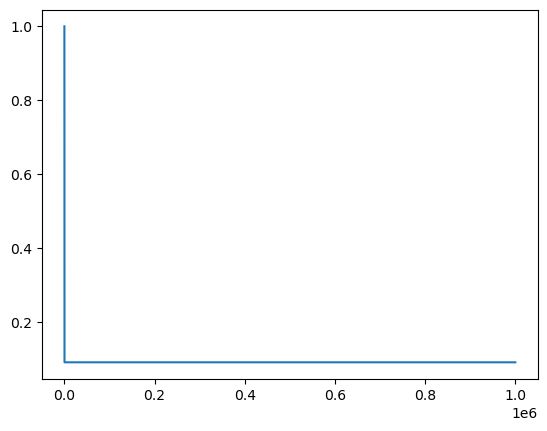

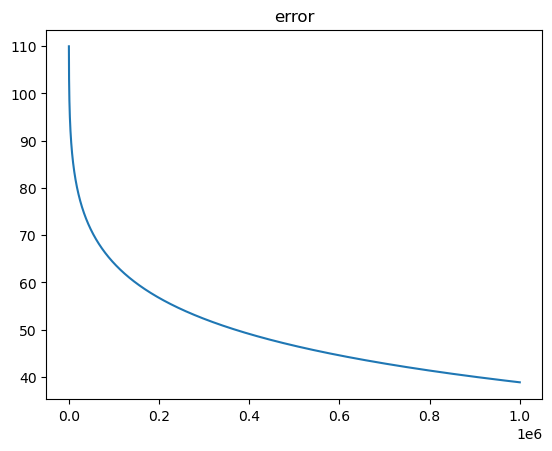

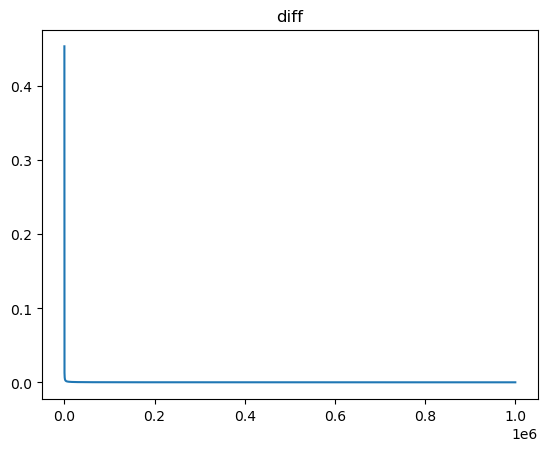

In [4]:
# plot max eigenvalues
plt.plot(list_max_eig[:])
plt.show()

# plot min eigenvalues
plt.plot(list_min_eig[:])
plt.show()
    
# plot error
plt.plot(list_err[:])
plt.title('error')
plt.show()

# plot diff
plt.plot(list_diff[:])
plt.title('diff')
plt.show()

In [5]:
product = A_n @ hess
product2 = hess @ A_n
res = A_n @ hess + hess @ A_n - 2*np.eye(2)

hess_inv = np.linalg.inv(hess)
diff = A_n - hess_inv

print(f'product:\n {product}\n')
print(f'product2:\n {product2}\n')
print(f'res:\n {res}\n')
print(f'norm of A_n - hess_inv: {np.linalg.norm(diff)}\n')

print(f'A_n:\n {A_n}\n')
print(f'hess_inv:\n {hess_inv}\n')

print(f'eigenvalues of A_n:\n {np.linalg.eigvals(A_n)}\n')
print(f'eigenvalues of hess_inv:\n {np.linalg.eigvals(hess_inv)}\n')

product:
 [[0.997 0.032]
 [0.032 0.652]]

product2:
 [[0.997 0.032]
 [0.032 0.652]]

res:
 [[-0.006 0.063]
 [0.063 -0.695]]

norm of A_n - hess_inv: 38.88277986415832

A_n:
 [[0.681 -6.491]
 [-6.491 71.436]]

hess_inv:
 [[1.000 -10.000]
 [-10.000 110.000]]

eigenvalues of A_n:
 [0.090 72.027]

eigenvalues of hess_inv:
 [0.090 110.910]

